<a href="https://colab.research.google.com/github/Koks-creator/MaskDetection/blob/main/Maski2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

# for fn in uploaded.keys():
#   print(f"User uploaded file {fn} with lengtth {uploaded[fn]} bytes.")

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 96% 317M/330M [00:02<00:00, 90.2MB/s]
100% 330M/330M [00:02<00:00, 122MB/s] 


In [ ]:
from zipfile import ZipFile
import os ,glob


file_name = "/content/face-mask-12k-images-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!pip install keras==2.4.3 tensorflow==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 27 kB/s 
     |████████████████████████████████| 459 kB 74.3 MB/s 
     |████████████████████████████████| 2.9 MB 48.6 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall

In [ ]:
import tensorflow as tf
import keras
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import os,glob

print(tf.__version__)
print(keras.__version__)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  after removing the cwd from sys.path.


2.3.1
2.4.3


In [ ]:
TRAIN_DIR = r"/content/Face Mask Dataset/Train"

X = []
y = []

for i in tqdm(os.listdir(TRAIN_DIR + "/WithMask")):
  img_path = TRAIN_DIR + "/WithMask" +"/" + i
  try:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append("WithMask")
  except Exception as e:
    print(e)
    print(f"Nie zadzialal: {i}")

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
TRAIN_DIR = r"/content/Face Mask Dataset/Train"


for i in tqdm(os.listdir(TRAIN_DIR + "/WithoutMask")):
  img_path = TRAIN_DIR + "/WithoutMask" +"/" + i
  try:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append("WithoutMask")
  except Exception as e:
    print(e)
    print(f"Nie zadzialal: {i}")

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
y.count("WithMask")

5000

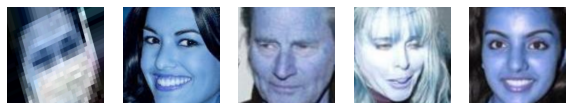

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X[-i], cmap="gray")
  plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print(type(X_train))
print(len(X_test))

<class 'list'>
3000


In [ ]:
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
from keras import layers

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128))
model.add(layers.Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(layers.Activation('softmax'))

In [ ]:
from tensorflow.keras.models import Model
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)
history = model.fit(X_train, y_train,
                    epochs=1, 
                    validation_data=(X_test, y_test),
                    initial_epoch=0,
                    callbacks=[early_stopping])

219/219 [==============================] - 490s 2s/step - loss: 0.5497 - accuracy: 0.9310 - val_loss: 0.1146 - val_accuracy: 0.9520


5660.png: nomask
226.png: nomask
1981.png: nomask
4552.png: nomask
1166.png: nomask
3588.png: nomask
3598.png: nomask
5728.png: nomask
5062.png: nomask
3771.png: nomask
1764.png: nomask
5714.png: nomask
3358.png: nomask
541.png: nomask
5664.png: nomask
1943.png: nomask
4156.png: nomask
2279.png: nomask
5857.png: mask


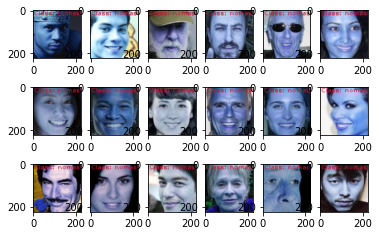

In [ ]:
classes = ["mask", "nomask"]

images = []
for image_name in os.listdir("/content/Face Mask Dataset/Validation/WithoutMask")[:19]:
    # print(image_name)
    if "png" in image_name:
      img = cv2.imread(r"/content/Face Mask Dataset/Validation/WithoutMask/" + image_name)
      img = cv2.resize(img, (224, 224))

      data = np.array([img])
      pred = model.predict(data)

      label = np.argmax(pred)
      print(f"{image_name}: {classes[label]}")

      cv2.putText(img, f"Class: {classes[label]}", (5, 25), cv2.FONT_HERSHEY_PLAIN, 2, (200, 20, 50), 2)
      images.append(img)
      # cv2.imshow(image_name, img)
      # cv2.waitKey(0)

for i in range(18):
    plt.subplot(3, 6, i + 1)
    plt.imshow(images[i], cmap='gray')
plt.show()

In [ ]:
model.save("MaskModel2.h5")